# Bagging

Bagging is used when the goal is to reduce the variance of a decision tree classifier. Here the objective is to create several subsets of data from training sample chosen randomly with replacement. Each collection of subset data is used to train their decision trees. As a result, we get an ensemble of different models. Average of all the predictions from different trees are used which is more robust than a single decision tree classifier.

## Bagging Steps:

Suppose there are N observations and M features in training data set. A sample from training data set is taken randomly with replacement.

A subset of M features are selected randomly and whichever feature gives the best split is used to split the node iteratively.
The tree is grown to the largest.

Above steps are repeated n times and prediction is given based on the aggregation of predictions from n number of trees.

## Advantages:

Reduces over-fitting of the model.

Handles higher dimensionality data very well.

Maintains accuracy for missing data.

## Disadvantages:

Since final prediction is based on the mean predictions from subset trees, it won’t give precise values for the classification and regression model.


Partioning of Data-: Random

Goal To Achieve-: Minimum Variance

Methods Used-: Random Subspace

Functions to combine single model-:	Weighted average


Example Of Bagging is Random Forest

# Random Forest

Random forest is a Supervised Machine Learning Algorithm that is used widely in Classification and Regression problems. It builds decision trees on different samples and takes their majority vote for classification and average in case of regression.

## Steps Involved In Random Forest Algorithm:

Step 1: In Random forest n number of random records are taken from the data set having k number of records.

Step 2: Individual decision trees are constructed for each sample.

Step 3: Each decision tree will generate an output.

Step 4: Final output is considered based on Majority Voting or Averaging for Classification and regression respectively.

## Important Features of Random Forest:

1. Diversity- Not all attributes/variables/features are considered while making an individual tree, each tree is different.

2. Immune to the curse of dimensionality- Since each tree does not consider all the features, the feature space is reduced.

3. Parallelization-Each tree is created independently out of different data and attributes. This means that we can make full use of the CPU to build random forests.

4.  Train-Test split- In a random forest we don’t have to segregate the data for train and test as there will always be 30% of the data which is not seen by the decision tree.

5.  Stability- Stability arises because the result is based on majority voting/ averaging.

## Important Hyperparameters:

Hyperparameters are used in random forests to either enhance the performance and predictive power of models or to make the model faster.

Following hyperparameters increases the predictive power:

1. n_estimators– number of trees the algorithm builds before averaging the predictions.

2. max_features– maximum number of features random forest considers splitting a node.

3. mini_sample_leaf– determines the minimum number of leaves required to split an internal node.

# Implementation Of Random Forest

In [22]:
# Importing the required libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [23]:
# Reading Data
data = pd.read_csv(r"C:\Users\dell\Downloads\Concrete_Data_Yeh.csv")
data.head(10)

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.70
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.45
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.29


In [24]:
data.columns

Index(['cement', 'slag', 'flyash', 'water', 'superplasticizer',
       'coarseaggregate', 'fineaggregate', 'age', 'csMPa'],
      dtype='object')

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


cement - Cement in mixture: (kg/m3)

slag - Blast furnace slag in mixture: (kg/m3)

flyash - Fly ash in mixture: (kg/m3)

water - Water in mixture: (kg/m3)

superplasticizer - Superplasticizer in mixture: (kg/m3)

coarseaggregate - Coarse aggregate in mixture: (kg/m3)

fineaggregate - Fine Aggregate in mixture: (kg/m3)

age - Age of the mixture: (days)

csMPa - Concrete compressive strength: (MPa)

In [26]:
data.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


variables slag, flyash, superplasticizer and age may contain outliers and/or have high skew.

## Skewness and Kurtosis Of Target Variable

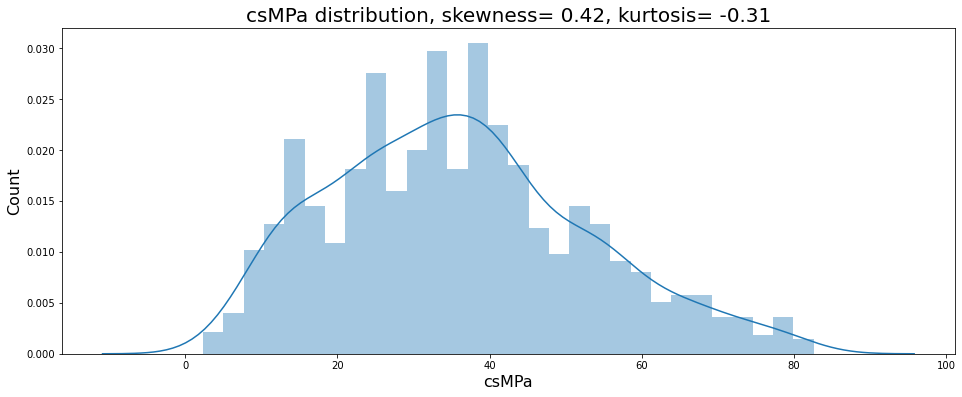

In [27]:
skewness = round(data["csMPa"].skew(), 2)
kurtosis = round(data["csMPa"].kurt(), 2)

plt.figure(figsize=(16, 6))
sns.distplot(data["csMPa"], kde=True, bins=30)
plt.title("csMPa distribution, skewness= " + str(skewness) +
          ", kurtosis= " + str(kurtosis), fontsize=20)
plt.xlabel("csMPa", fontsize=16)
plt.ylabel("Count", fontsize=16)

plt.show()

Target variable csMPa has a decently normal distribution

Relatively low skew and kurtosis values



## Outlier Of Target Variable

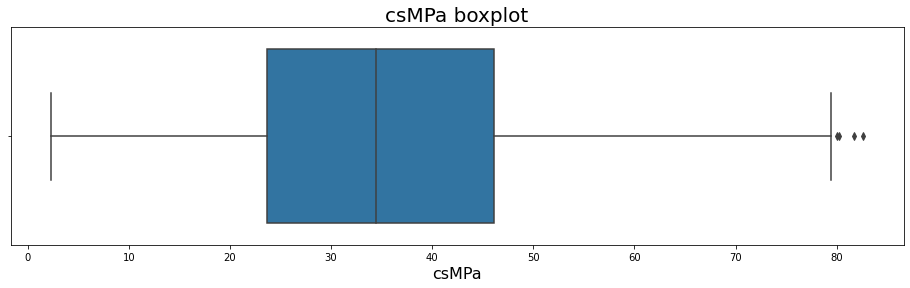

In [28]:
plt.figure(figsize=(16, 4))
sns.boxplot(x="csMPa", data=data)
plt.title("csMPa boxplot", fontsize=20)
plt.xlabel("csMPa", fontsize=16)

plt.show()

There's only a few outliers, so that shouldn't impact model accuracy in a significant way.

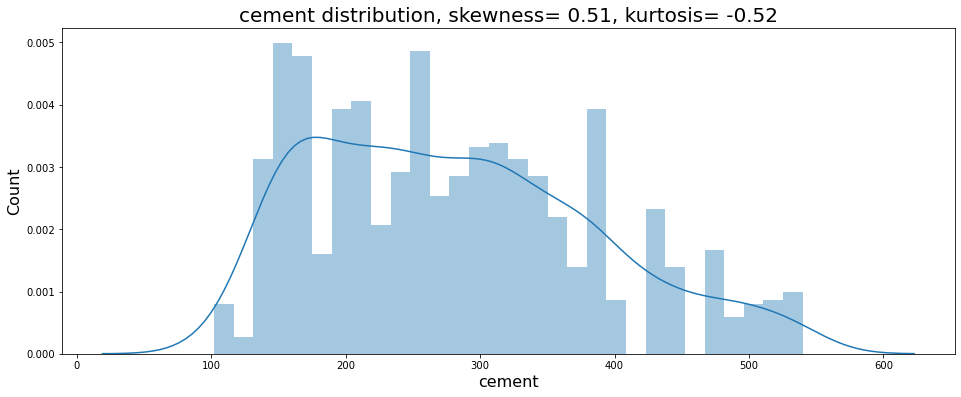

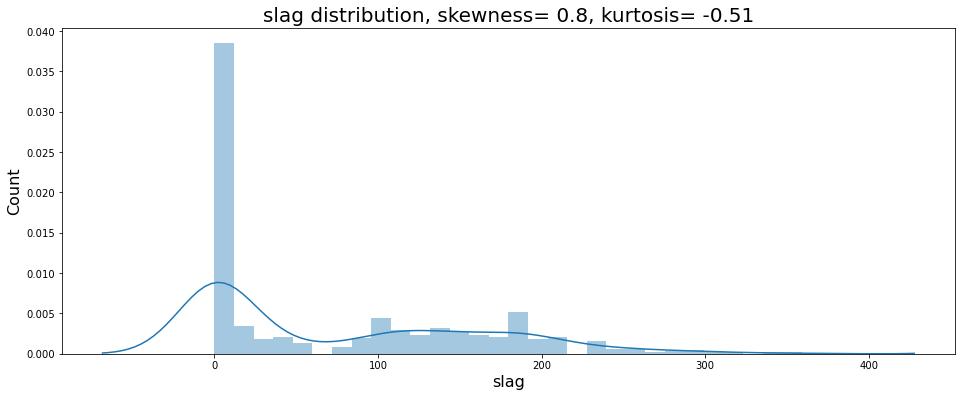

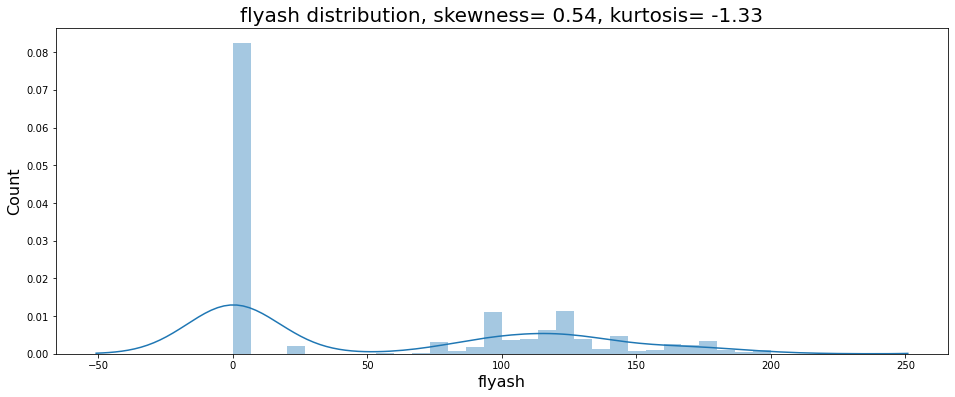

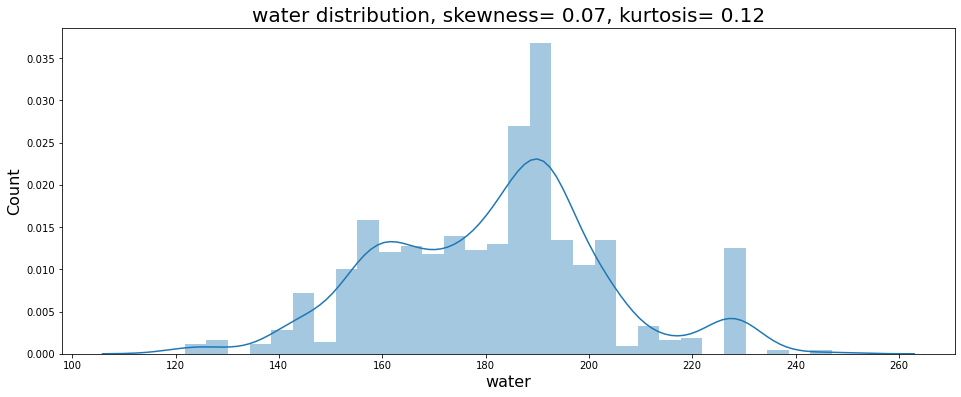

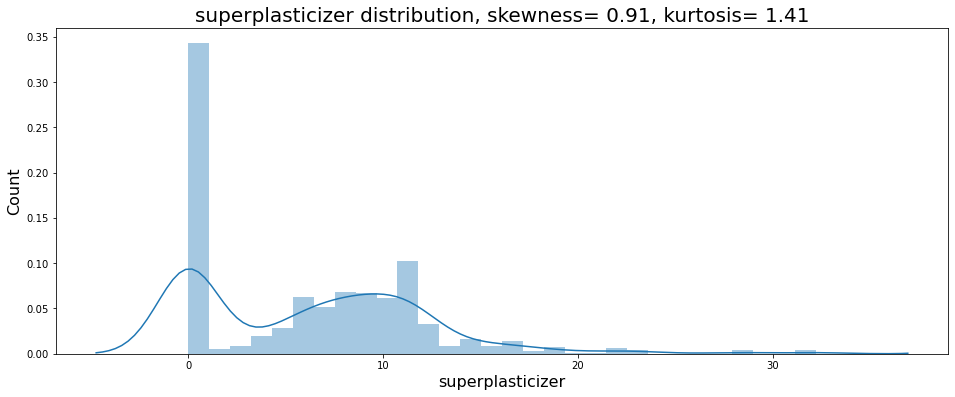

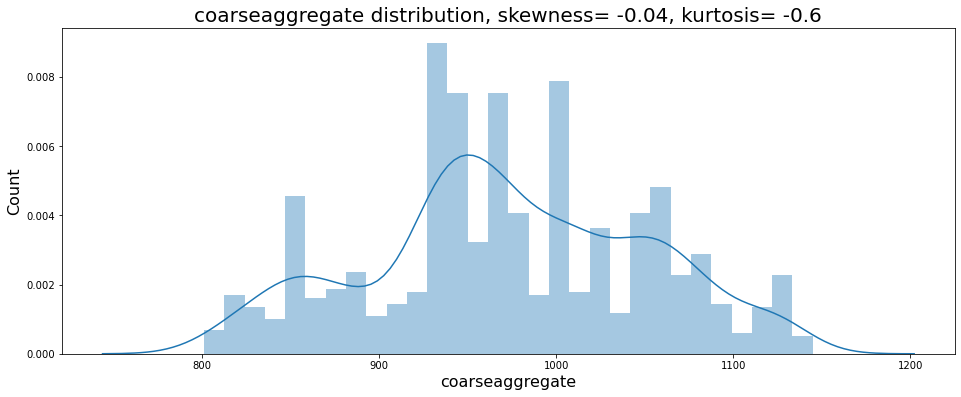

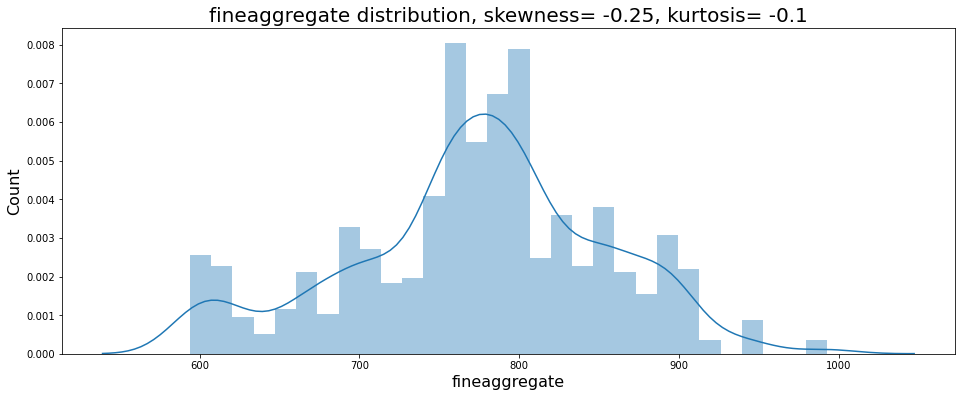

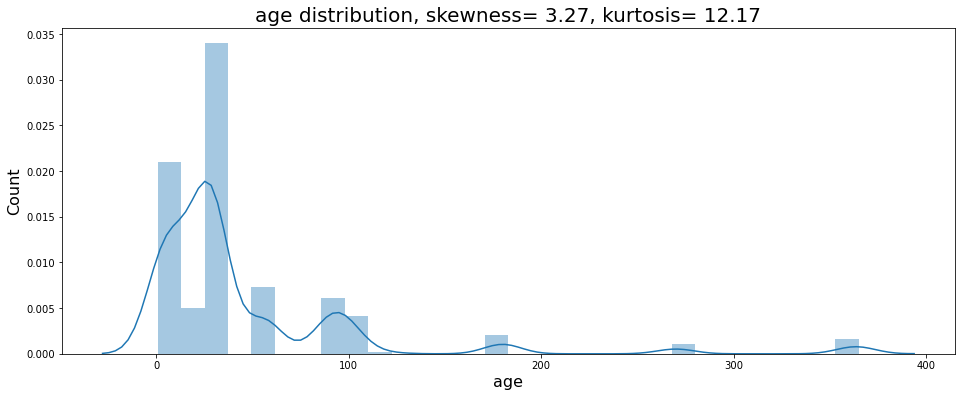

In [29]:
df_vars_num = data.drop('csMPa', axis=1)

for col_name in df_vars_num:

    skewness = round(df_vars_num[col_name].skew(), 2)
    kurtosis = round(df_vars_num[col_name].kurt(), 2)

    plt.figure(figsize=(16, 6))
    sns.distplot(df_vars_num[col_name], kde=True, bins=30)
    plt.title(col_name + " distribution, skewness= "+str(skewness) + ", kurtosis= " + str(kurtosis), fontsize=20)
    plt.xlabel(col_name, fontsize=16)
    plt.ylabel("Count", fontsize=16)
    plt.show()

Variables slag, superplasticizer, age have moderatly high skewness (absolute value larger than 0.7)

Variables flyash, superplasticizer have moderatly high kurtosis (absolute value larger than 1)

Variable age has very high kurtosis - 12.17

Normalizing those variables will most likely raise model accuracy

slag, flyash, superplasticizer contain a large amount of 0-values

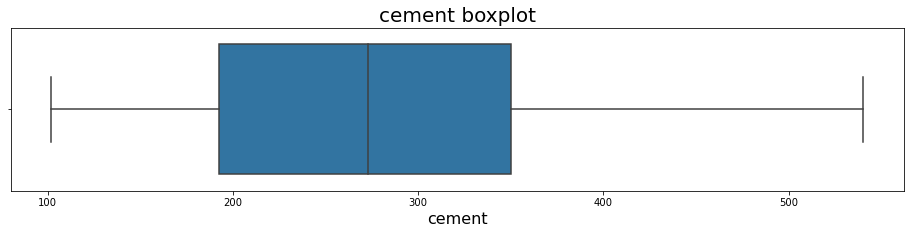

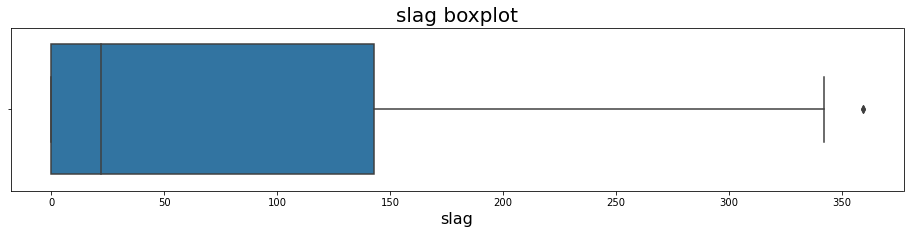

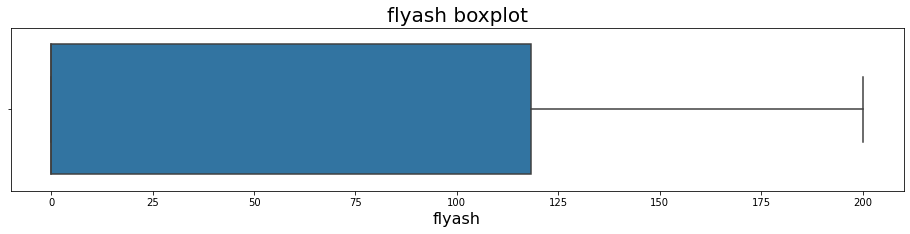

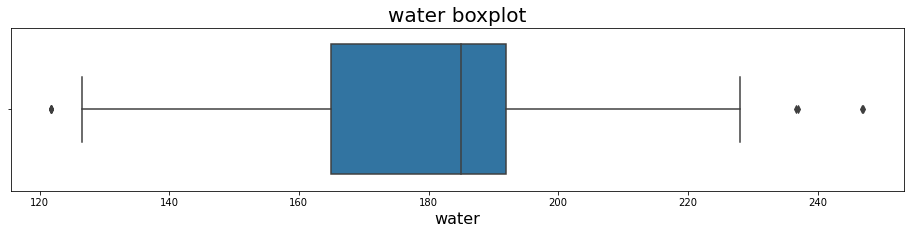

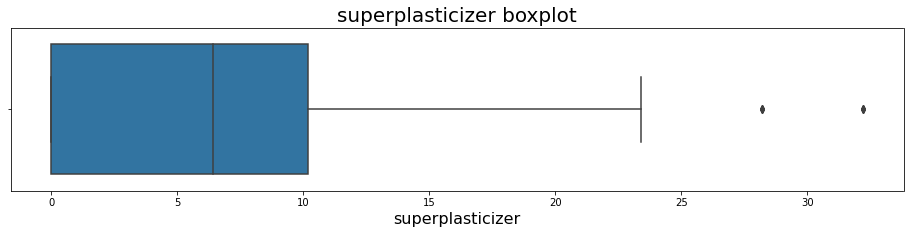

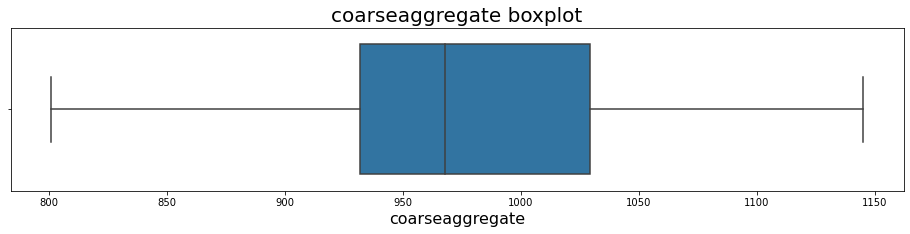

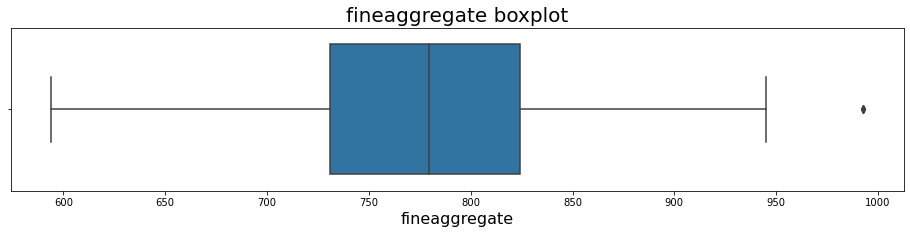

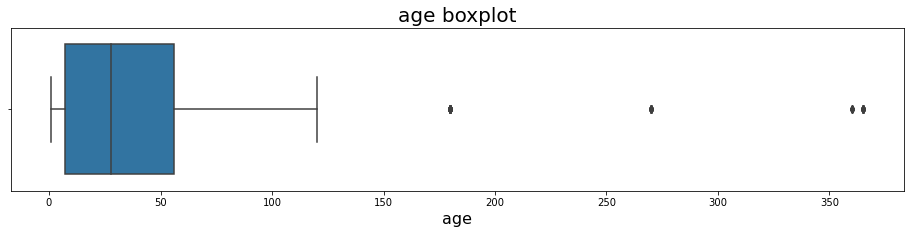

In [30]:
for col_name in df_vars_num:
    plt.figure(figsize=(16, 3))
    sns.boxplot(x=df_vars_num[col_name])
    plt.title(col_name + " boxplot", fontsize=20)
    plt.xlabel(col_name, fontsize=16)
    plt.show()

slag, water, superplasticizer contain a low amount of outliers - shouldn't be a problem

age contains a potentially large amount of outliers - this should be further investigated as linear models tend to be very sensitive to outliers in data


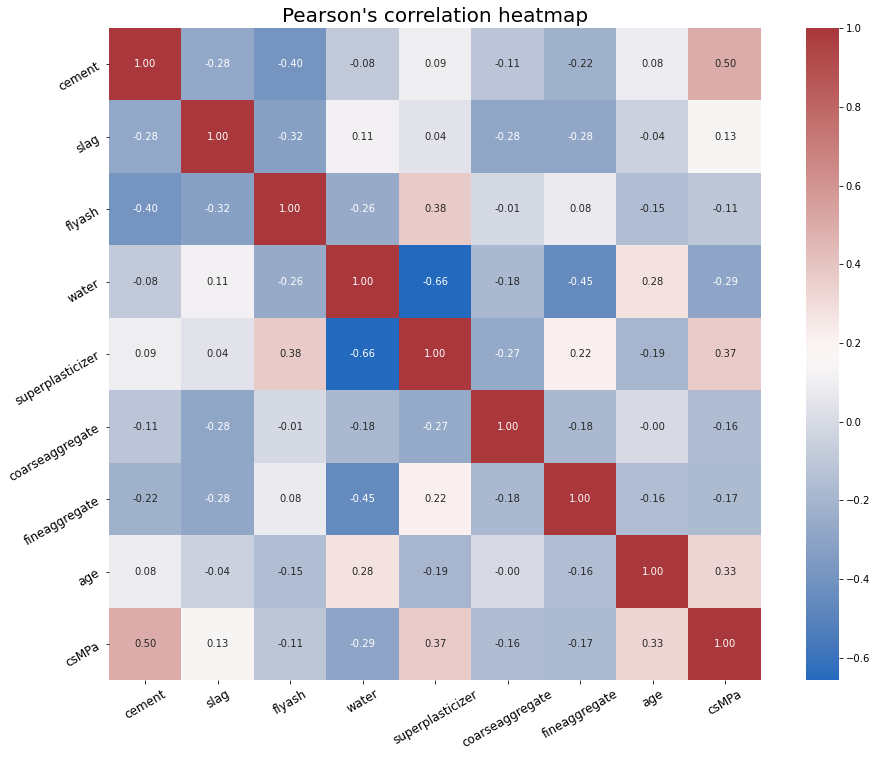

In [31]:
correlations = data.corr()
plt.figure(figsize=(16, 12))
ax = sns.heatmap(correlations, square=True, annot=True,
                 fmt='.2f', linecolor='white', cmap="vlag")
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30, fontsize=12)
plt.title("Pearson's correlation heatmap", fontsize=20)
plt.show()

cement is slightly positively correlated with the target variable.

superplasticizer and age are very lightly correlated with the target variable.

water is very lightly negatively correlated with the target variable.

No predictors are highly correlated with eachother - There's no multicollinearity.

In [32]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, r2_score, mean_absolute_error, mean_squared_error
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

In [33]:
y = data["csMPa"]
X = data.drop(["csMPa"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(824, 8) (206, 8) (824,) (206,)


In [34]:
X_train

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age
128,401.8,94.7,0.0,147.4,11.4,946.8,852.1,28
365,214.9,53.8,121.9,155.6,9.6,1014.3,780.6,14
480,446.0,24.0,79.0,162.0,11.6,967.0,712.0,7
814,310.0,0.0,0.0,192.0,0.0,970.0,850.0,360
169,425.0,106.3,0.0,153.5,16.5,852.1,887.1,91
...,...,...,...,...,...,...,...,...
360,218.2,54.6,123.8,140.8,11.9,1075.7,792.7,14
466,190.3,0.0,125.2,166.6,9.9,1079.0,798.9,100
299,290.4,0.0,96.2,168.1,9.4,961.2,865.0,3
493,387.0,20.0,94.0,157.0,11.6,938.0,845.0,7


In [35]:
feature_scaler = MinMaxScaler()
X_train = pd.DataFrame(feature_scaler.fit_transform(
    X_train), columns=X_train.columns)
X_test = pd.DataFrame(feature_scaler.transform(X_test),
                      columns=X_train.columns)

In [36]:
X_train

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age
0,0.684475,0.263495,0.000000,0.204473,0.354037,0.423837,0.647516,0.074176
1,0.257763,0.149694,0.609195,0.269968,0.298137,0.620058,0.468138,0.035714
2,0.785388,0.066778,0.394803,0.321086,0.360248,0.482558,0.296036,0.016484
3,0.474886,0.000000,0.000000,0.560703,0.000000,0.491279,0.642248,0.986264
4,0.737443,0.295771,0.000000,0.253195,0.512422,0.148547,0.735324,0.247253
...,...,...,...,...,...,...,...,...
819,0.265297,0.151920,0.618691,0.151757,0.369565,0.798547,0.498495,0.035714
820,0.201598,0.000000,0.625687,0.357827,0.307453,0.808140,0.514049,0.271978
821,0.430137,0.000000,0.480760,0.369808,0.291925,0.465698,0.679880,0.005495
822,0.650685,0.055648,0.469765,0.281150,0.360248,0.398256,0.629704,0.016484


In [37]:
rforest_reg = RandomForestRegressor()

In [38]:
params = [{'n_estimators': [500, 600, 800],
           'min_samples_split': [2, 5, 10],
           'min_samples_leaf': [1, 2, 5],
           'max_depth': [20, 25, 30, 35, 40]}]

In [39]:
cv_scheme = KFold(n_splits=5, shuffle=True, random_state=1)
cv = GridSearchCV(estimator=rforest_reg, param_grid=params, scoring='neg_root_mean_squared_error',
                  cv=cv_scheme, return_train_score=True, n_jobs=-1)

cv.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid=[{'max_depth': [20, 25, 30, 35, 40],
                          'min_samples_leaf': [1, 2, 5],
                          'min_samples_split': [2, 5, 10],
                          'n_estimators': [500, 600, 800]}],
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [40]:
print("Best parameters for Random Forest Regression:")
print(cv.best_params_)
print("Best mean cross validation score:")
print(cv.best_score_)

Best parameters for Random Forest Regression:
{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 600}
Best mean cross validation score:
-5.435121647104126


In [41]:
n_estimators = cv.best_params_['n_estimators']
min_samples_split = cv.best_params_['min_samples_split']
min_samples_leaf = cv.best_params_['min_samples_leaf']
max_depth = cv.best_params_['max_depth']

rforest_reg = RandomForestRegressor(
    n_estimators=n_estimators, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, max_depth=max_depth, random_state=1)
rforest_reg.fit(X_train, y_train)

y_pred = rforest_reg.predict(X_test)

rforest_r2 = r2_score(y_test, y_pred)
rforest_mae = mean_absolute_error(y_test, y_pred)
rforest_rmse = mean_squared_error(y_test, y_pred, squared=False)
print("---RANDOM FOREST REGRESSOR---")
print("R2 score: "+str(rforest_r2))
print("Mean Absolute Error: "+str(rforest_mae))
print("Root Mean Squared Error: "+str(rforest_rmse))

---RANDOM FOREST REGRESSOR---
R2 score: 0.8979255441369308
Mean Absolute Error: 3.4396462591810817
Root Mean Squared Error: 5.011313994384772


In [43]:
import graphviz
estimator = rforest_reg.estimators_[20]

from sklearn.tree import export_graphviz
from sklearn import tree
import pylab
# Export as dot file
dot_data = tree.export_graphviz(estimator, out_file=None, 
                feature_names = X.columns,
                
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 


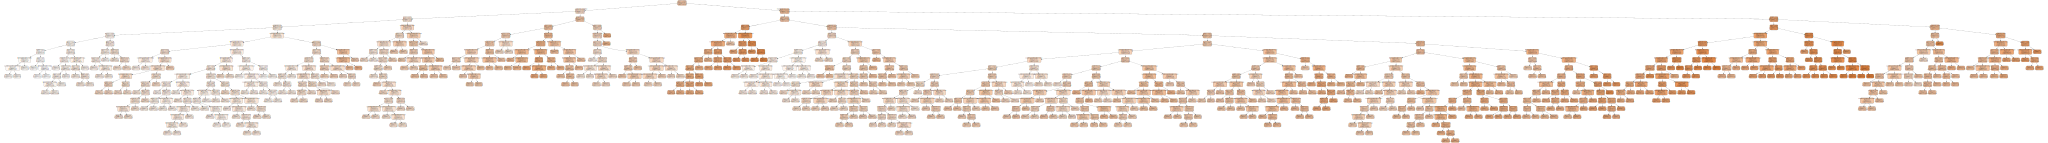

In [44]:
graph

In [51]:
rf_best = cv.best_estimator_
rf_best

RandomForestRegressor(max_depth=20, n_estimators=600)

In [52]:
rf_best.feature_importances_

array([0.33326265, 0.07421259, 0.02193008, 0.12486624, 0.05097496,
       0.02300345, 0.03757988, 0.33417016])

In [53]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

In [54]:
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
7,age,0.334170
0,cement,0.333263
3,water,0.124866
1,slag,0.074213
4,superplasticizer,0.050975
6,fineaggregate,0.037580
5,coarseaggregate,0.023003
2,flyash,0.021930
